# Factorización LU

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = np.array([[5., 2., 9.], [4., 6., 8.,], [10., 8., 9.]])
A

array([[ 5.,  2.,  9.],
       [ 4.,  6.,  8.],
       [10.,  8.,  9.]])

In [3]:
def fact_lu(A, epsilon=1e-15):
    m, n = np.shape(A)
    if m != n: # La matriz no es cuadrada
        return None
    L = np.zeros((n, n))
    U = np.copy(A)
    for j in range(n-1):
        if abs(U[j,j]) < epsilon: # Hay un cero en la diagonal
            return None
        for i in range(j+1,n):
            L[i,j] = U[i,j]/U[j,j]
            U[i] = U[i] - L[i,j]*U[j]
    L = L + np.eye(n)
    return L, U

In [4]:
L, U = fact_lu(A)
L

array([[1.        , 0.        , 0.        ],
       [0.8       , 1.        , 0.        ],
       [2.        , 0.90909091, 1.        ]])

In [5]:
U

array([[ 5.        ,  2.        ,  9.        ],
       [ 0.        ,  4.4       ,  0.8       ],
       [ 0.        ,  0.        , -9.72727273]])

In [6]:
A - L@U

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [7]:
np.linalg.norm(A - L@U)

np.float64(0.0)

# Factorización PLU

In [8]:
def perm_rows(A, i, j):
    B = np.copy(A)
    A[i] = B[j]
    A[j] = B[i]
    return A

In [9]:
def ind_max(v, j):
    v = np.abs(v)
    index = np.argmax(v[j:])
    index += j
    return index

In [10]:
def fact_plu(A, epsilon=1e-15): 
    m, n = np.shape(A)
    if m != n:
        return None # La matriz no es cuadrada
    P = np.eye(n)
    L = np.zeros((n, n))
    U = np.copy(A)
    for j in range(n-1):
        index = ind_max(U[:,j], j)
        if abs(U[index, j]) < epsilon:
            return None # La matriz no es invertible
        P = perm_rows(P, j, index)
        L = perm_rows(L, j, index)
        U = perm_rows(U, j, index)
        for i in range(j+1,n):
            L[i,j] = (U[i,j])/(U[j,j])
            U[i] = U[i] - L[i,j]*U[j]
    L = L + np.eye(n)
    return P, L, U

In [11]:
M = 20 # M: Máximo valor de la distribución
A = M*np.random.rand(3,3)
A

array([[ 9.60789308,  9.04670816,  6.68174326],
       [10.79007119,  6.4170517 ,  8.7019856 ],
       [ 4.41432199,  4.49151083, 18.14196808]])

In [12]:
P, L, U = fact_plu(A)
P

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [13]:
L

array([[1.        , 0.        , 0.        ],
       [0.89043834, 1.        , 0.        ],
       [0.40910963, 0.55997312, 1.        ]])

In [14]:
U

array([[10.79007119,  6.4170517 ,  8.7019856 ],
       [ 0.        ,  3.3327193 , -1.06683834],
       [ 0.        ,  0.        , 15.1793028 ]])

In [15]:
P@A - L@U

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [16]:
np.linalg.norm(P@A - L@U)

np.float64(0.0)

In [17]:
errores_LU = []
enes = list(range(3,301,3))
for n in enes:
    M = 10 # M: Máximo valor de la distribución
    A = M*np.random.rand(n,n)
    L, U = fact_lu(A)
    errores_LU.append(np.linalg.norm(A - L@U))

In [18]:
errores_PLU = []
for n in enes:
    M = 10 # M: Máximo valor de la distribución
    A = M*np.random.rand(n,n)
    P, L, U = fact_plu(A)
    errores_PLU.append(np.linalg.norm(P@A - L@U))

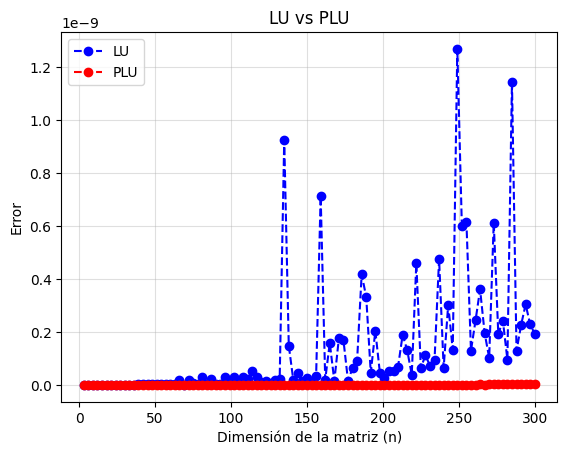

In [19]:
plt.plot(enes, errores_LU, 'b--o', label='LU')
plt.plot(enes, errores_PLU, 'r--o', label='PLU')
plt.xlabel('Dimensión de la matriz (n)')
plt.ylabel('Error')
plt.title('LU vs PLU')
plt.grid(alpha=0.4)
plt.legend()
plt.show()

# Solución del SEL

In [20]:
def sel(A, b):
    L, U = fact_lu(A)
    n = np.size(A[0])
    y = np.zeros((n,1))
    y[0] = b[0]
    for k in range (1,n):
        y[k] = b[k]-L[k,0:k]@y[0:k]
    x = np.zeros((n,1))
    x[n-1] = y[n-1]/U[n-1,n-1]
    for k in range(n-2,-1,-1):
        x[k] = (y[k] - U[k,k+1:n]@x[k+1:n,0])/U[k,k]
    return x, y, L, U

In [21]:
A = np.array([[4.,5.,2.,-1.],
              [5.,8.,7.,6.],
              [3.,7.,-4.,-2.],
              [-1.,6.,-2.,5.]])
b = np.array([[3.,2.,0.,1.]]).T

In [22]:
x, y, L, U = sel(A, b)

In [23]:
x

array([[-3.12698413],
       [ 1.92063492],
       [ 1.98412698],
       [-1.93650794]])

In [24]:
y

array([[ 3.        ],
       [-1.75      ],
       [ 1.        ],
       [ 7.54639175]])

In [25]:
L

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 1.25      ,  1.        ,  0.        ,  0.        ],
       [ 0.75      ,  1.85714286,  1.        ,  0.        ],
       [-0.25      ,  4.14285714,  1.45360825,  1.        ]])

In [26]:
U

array([[ 4.00000000e+00,  5.00000000e+00,  2.00000000e+00,
        -1.00000000e+00],
       [ 0.00000000e+00,  1.75000000e+00,  4.50000000e+00,
         7.25000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.38571429e+01,
        -1.47142857e+01],
       [ 0.00000000e+00, -8.88178420e-16,  0.00000000e+00,
        -3.89690722e+00]])

In [27]:
A = np.array([[1.,1.,0.,3.],
              [2.,1.,-1.,1.],
              [3.,-1.,-1.,2.],
              [-1.,2.,3.,-1.]])
b = np.array([[8.,7.,14.,-7.]]).T
x, y, L, U = sel(A, b)

In [28]:
print(x)
print(y)
print(L)
print(U)

[[ 3.]
 [-1.]
 [ 0.]
 [ 2.]]
[[  8.]
 [ -9.]
 [ 26.]
 [-26.]]
[[ 1.  0.  0.  0.]
 [ 2.  1.  0.  0.]
 [ 3.  4.  1.  0.]
 [-1. -3.  0.  1.]]
[[  1.   1.   0.   3.]
 [  0.  -1.  -1.  -5.]
 [  0.   0.   3.  13.]
 [  0.   0.   0. -13.]]
